In [1]:
%matplotlib inline
from proj import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sweep(solnMesh, xs, q, N, g) : 
    # Get quadrature
    [mu,w] = np.polynomial.legendre.leggauss(N)
    
    # Initialize angular flux
    psi = np.zeros([solnMesh.nX,N])
    
    # Sweep each direction
    for m in range(N) :
        if mu[m] > 0.0 :
            psiInc = 0.0
            for i in range(solnMesh.nX) :
                h = solnMesh.x[i+1]-solnMesh.x[i]
                sigma = xs[solnMesh.mat[i]-1].sigTr[g-1]
                psi[i,m] = (q[i]*h + 2.0*mu[m]*psiInc)/(sigma*h + 2.0*mu[m])
                psiInc = 2.0*psi[i,m] - psiInc
        else :
            psiInc = 0.0
            for i in range(solnMesh.nX-1,-1,-1) :
                h = solnMesh.x[i+1]-solnMesh.x[i]
                sigma = xs[solnMesh.mat[i]-1].sigTr[g-1]
                psi[i,m] = (q[i]*h - 2.0*mu[m]*psiInc)/(sigma*h - 2.0*mu[m])
                psiInc = 2.0*psi[i,m] - psiInc
                
    # Calculate scalar flux
    phi = np.zeros(solnMesh.nX)
    for i in range(solnMesh.nX) :
        for m in range(N) :
            phi[i] = phi[i] + w[m]*psi[i,m]
            
    return phi

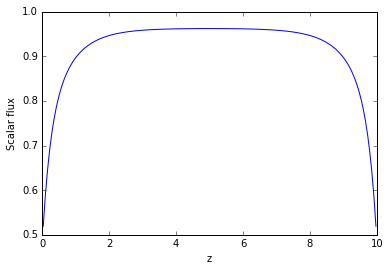

In [4]:
solnMesh = Mesh(10, 
                np.linspace(0.0,10,11), 
                [1,1,1,1,1,1,1,1,1,1],
                [2,1])
for i in range(4) :
    solnMesh = refineMesh(solnMesh);
    
xs = getXS()

q = 0.5*np.ones(solnMesh.nX)

# Calculate the scalar flux
g = 2
phi = sweep(solnMesh,xs,q,6,g)

# Plot your results at cell centers
xCell = np.zeros(solnMesh.nX);
for i in range(solnMesh.nX) :
    xCell[i] = (solnMesh.x[i]+solnMesh.x[i+1])/2.0;

plt.plot(xCell,phi)
plt.xlabel('z')
plt.ylabel('Scalar flux')

In [18]:
solnMesh = Mesh(10,
             np.linspace(0.0,25,11),
             [1,1,1,1,1,1,1,1,1,1],
             [2,1])
for i in range(4) :
    solnMesh = refineMesh(solnMesh);
xs = getXS()
[ flux_s6, k_s6 ] = powerIterationSolve( solnMesh,xs,6,sweep )

1.0799015539


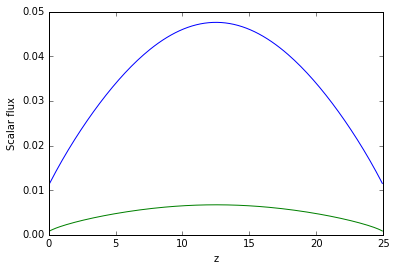

In [19]:
print k_s6
xCell = np.zeros(solnMesh.nX);
for i in range(solnMesh.nX) :
    xCell[i] = (solnMesh.x[i]+solnMesh.x[i+1])/2.0;

plt.plot(xCell,flux_s6)
plt.xlabel('z')
plt.ylabel('Scalar flux')

0.904992609174
7.15298212626


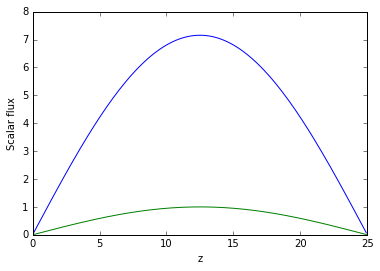

In [44]:
B = np.pi/25.0
D1 = 1.0/(3.0*xs[0].sigTr[0])
D2 = 1.0/(3.0*xs[0].sigTr[1])
SigmaR1 = xs[0].sigA[0] + xs[0].sigS[1][0]
SigmaR2 = xs[0].sigA[1]
num = xs[0].nuBar*xs[0].sigF[0]*(D2*B**2 + SigmaR2) + xs[0].sigS[1][0]*xs[0].nuBar*xs[0].sigF[1]
denom = (D1*B**2 + SigmaR1)*(D2*B**2 + SigmaR2)
k_diff = num/denom
print k_diff

FastToThermalRatio = (D2*B**2 + SigmaR2)/xs[0].sigS[1][0]
flux_diff_1 = FastToThermalRatio*np.sin(B*xCell)
flux_diff_2 = np.sin(B*xCell)
print FastToThermalRatio
plt.plot(xCell,flux_diff_1, xCell,flux_diff_2)
plt.xlabel('z')
plt.ylabel('Scalar flux')

In [34]:
D2

0.3209325014762895

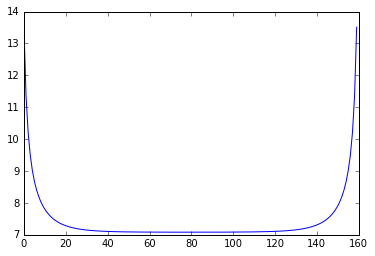

In [30]:
plt.plot(flux_s6[:,0]/flux_s6[:,1])